In [45]:
import sys
import os

# Add the root directory to sys.path
sys.path.append(os.path.abspath(".."))

Epoch 1/10, Loss: 0.274607, Test Loss: 0.002915
Epoch 2/10, Loss: 0.002114, Test Loss: 0.001025
Epoch 3/10, Loss: 0.000921, Test Loss: 0.000532
Epoch 4/10, Loss: 0.000518, Test Loss: 0.000291
Epoch 5/10, Loss: 0.000285, Test Loss: 0.000147
Epoch 6/10, Loss: 0.000159, Test Loss: 0.000113
Epoch 7/10, Loss: 0.000091, Test Loss: 0.000059
Epoch 8/10, Loss: 0.000059, Test Loss: 0.000028
Epoch 9/10, Loss: 0.000041, Test Loss: 0.000036
Epoch 10/10, Loss: 0.000033, Test Loss: 0.000010


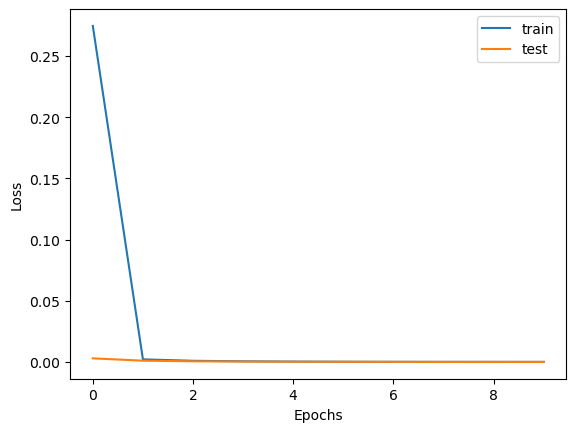

Model training completed successfully. Weights have been saved as 'baseline_model.pth' in the 'weights' directory.


In [46]:
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.feedforward_nn import FeedforwardNN
from random_exploration import random_exploration
from train import create_dataloader, train_model

import torch
import os

env = MassSpringDamperEnv()

# Hyperparameters
NUM_TRAJECTORIES = 100
HORIZON = 500
BATCH_SIZE = 50
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
HIDDEN_SIZE = 64

# Collect data from the environment
states, actions, next_states = random_exploration(env, NUM_TRAJECTORIES, HORIZON)
# Create DataLoader for training
train_dataloader = create_dataloader(states, actions, next_states, BATCH_SIZE)
# Collect data for test set
states, actions, next_states = random_exploration(env, 1, 500)
# Create DataLoader for training
test_dataloader = create_dataloader(states, actions, next_states, 500)

# Initialize the dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

# Train the model
train_model(model, train_dataloader, test_dataloader, NUM_EPOCHS, LEARNING_RATE)

# Ensure the 'weights' directory exists
os.makedirs('../weights', exist_ok=True)

# Save the trained model
torch.save(model.state_dict(), '../weights/baseline_model.pth')
print("Model training completed successfully. "
      "Weights have been saved as 'baseline_model.pth' in the 'weights' directory.")

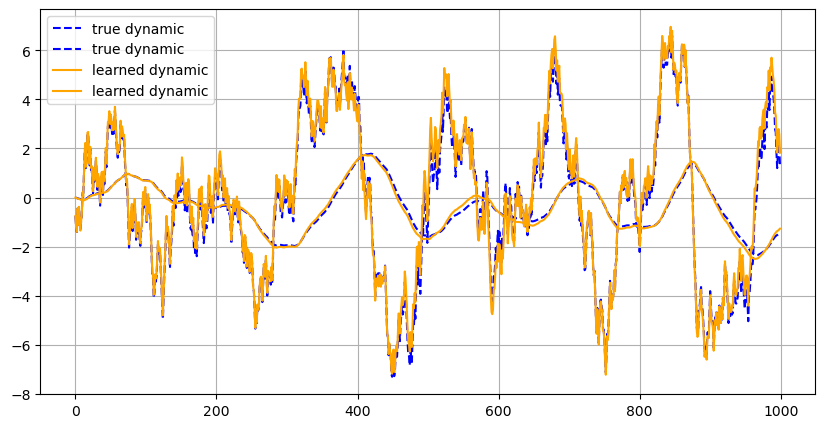

In [47]:
# test model
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv

import numpy as np
import pygame
import matplotlib.pyplot as plt

# set random seed to get same test trajectory
test_seed = 44

# Using trained model as system dynamic
if __name__ == "__main__":
    # Initialize trained dynamics model
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    trained_model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

    # load saved weights
    trained_model.load_state_dict(torch.load('../weights/baseline_model.pth'))
    trained_model.eval()

    trained_env = MassSpringDamperEnv(model=trained_model)
    trained_env.reset()
    env.reset()
    env.action_space.seed(test_seed)
    env.action_space.seed(test_seed)
    save = [[],[]]
    # clock = pygame.time.Clock()
    for _ in range(1000):
        action = env.action_space.sample()
        obs, _, _, _, _= env.step(action)
        save[0].append(obs)
        obs, _, _, _, _= trained_env.step(action)
        save[1].append(obs)
        # clock.tick(400)

trained_env.close()
plt.figure(1, (10,5))
plt.plot(save[0], label="true dynamic", color="blue", linestyle="--")
plt.plot(save[1], label="learned dynamic", color="orange")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/10, Loss: 0.338883, Test Loss: 0.004136
Epoch 2/10, Loss: 0.003051, Test Loss: 0.001967
Epoch 3/10, Loss: 0.001517, Test Loss: 0.001013
Epoch 4/10, Loss: 0.000886, Test Loss: 0.000615
Epoch 5/10, Loss: 0.000496, Test Loss: 0.000403
Epoch 6/10, Loss: 0.000291, Test Loss: 0.000263
Epoch 7/10, Loss: 0.000182, Test Loss: 0.000095
Epoch 8/10, Loss: 0.000096, Test Loss: 0.000085
Epoch 9/10, Loss: 0.000059, Test Loss: 0.000045
Epoch 10/10, Loss: 0.000054, Test Loss: 0.000040


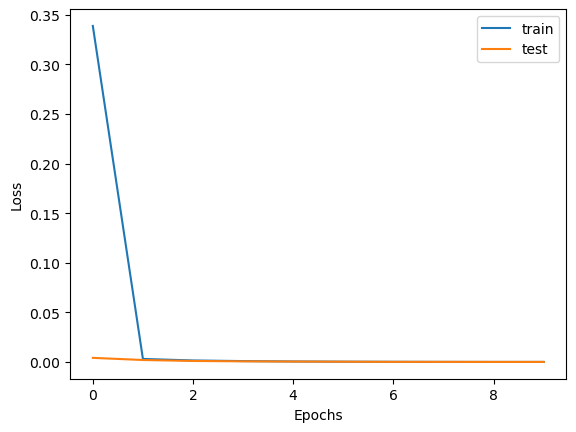

Model training completed successfully. Weights have been saved as 'baseline_model.pth' in the 'weights' directory.


In [48]:
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv
from models.feedforward_nn import FeedforwardNN
from random_exploration import random_exploration
from train import create_dataloader, train_model

import torch
import os

env = MassSpringDamperEnv(nlin=True)

# Hyperparameters
NUM_TRAJECTORIES = 100
HORIZON = 500
BATCH_SIZE = 50
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
HIDDEN_SIZE = 64

# Collect data from the environment
states, actions, next_states = random_exploration(env, NUM_TRAJECTORIES, HORIZON)
# Create DataLoader for training
train_dataloader = create_dataloader(states, actions, next_states, BATCH_SIZE)
# Collect data for test set
states, actions, next_states = random_exploration(env, 1, 500)
# Create DataLoader for training
test_dataloader = create_dataloader(states, actions, next_states, 500)

# Initialize the dynamics model
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

# Train the model
train_model(model, train_dataloader, test_dataloader, NUM_EPOCHS, LEARNING_RATE)

# Ensure the 'weights' directory exists
os.makedirs('../weights', exist_ok=True)

# Save the trained model
torch.save(model.state_dict(), '../weights/baseline_model.pth')
print("Model training completed successfully. "
      "Weights have been saved as 'baseline_model.pth' in the 'weights' directory.")

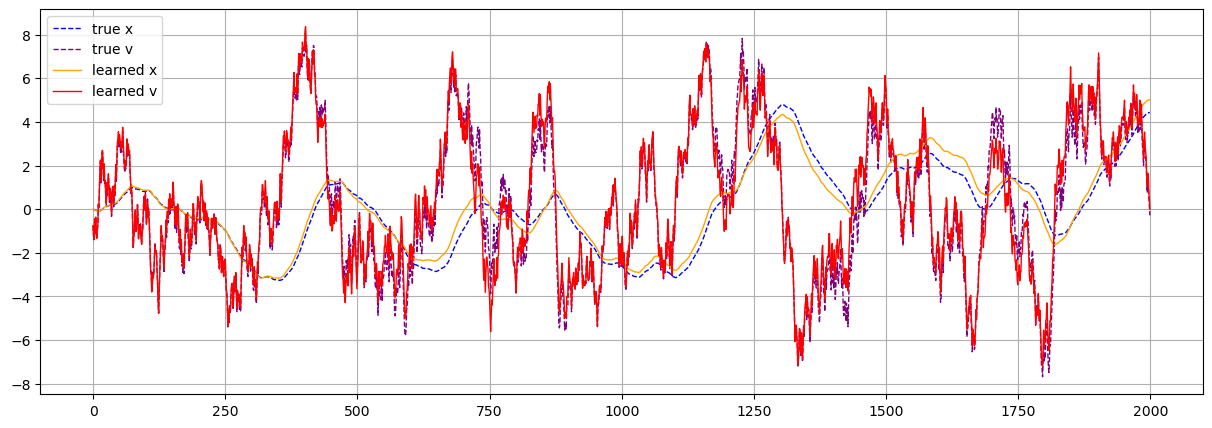

In [ ]:
# test model
from dynamical_systems.mass_spring_damper_system import MassSpringDamperEnv

import numpy as np
import pygame
import matplotlib.pyplot as plt

# set random seed to get same test trajectory
test_seed = 44

# Using trained model as system dynamic
if __name__ == "__main__":
    # Initialize trained dynamics model
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]
    trained_model = FeedforwardNN(state_dim, action_dim, hidden_size=HIDDEN_SIZE)

    # load saved weights
    trained_model.load_state_dict(torch.load('../weights/baseline_model.pth'))
    trained_model.eval()

    # learned dynamic
    trained_env = MassSpringDamperEnv(model=trained_model)
    trained_env.reset()
    env.reset()
    env.action_space.seed(test_seed)
    env.action_space.seed(test_seed)
    save = [[],[]]
    # clock = pygame.time.Clock()
    for _ in range(2000):
        action = env.action_space.sample()
        obs, _, _, _, _= env.step(action)
        save[0].append(obs)
        obs, _, _, _, _= trained_env.step(action)
        save[1].append(obs)
        # clock.tick(400)
trained_env.close()

saved_traj = np.array(save)
plt.figure(1, (15,5))
plt.plot(saved_traj[0,:,0], label="true x", color="blue", linestyle="--", linewidth=1)
plt.plot(saved_traj[0,:,1], label="true v", color="purple", linestyle="--", linewidth=1)
plt.plot(saved_traj[1,:,0], label="learned x", color="orange", linewidth=1)
plt.plot(saved_traj[1,:,1], label="learned v", color="red", linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

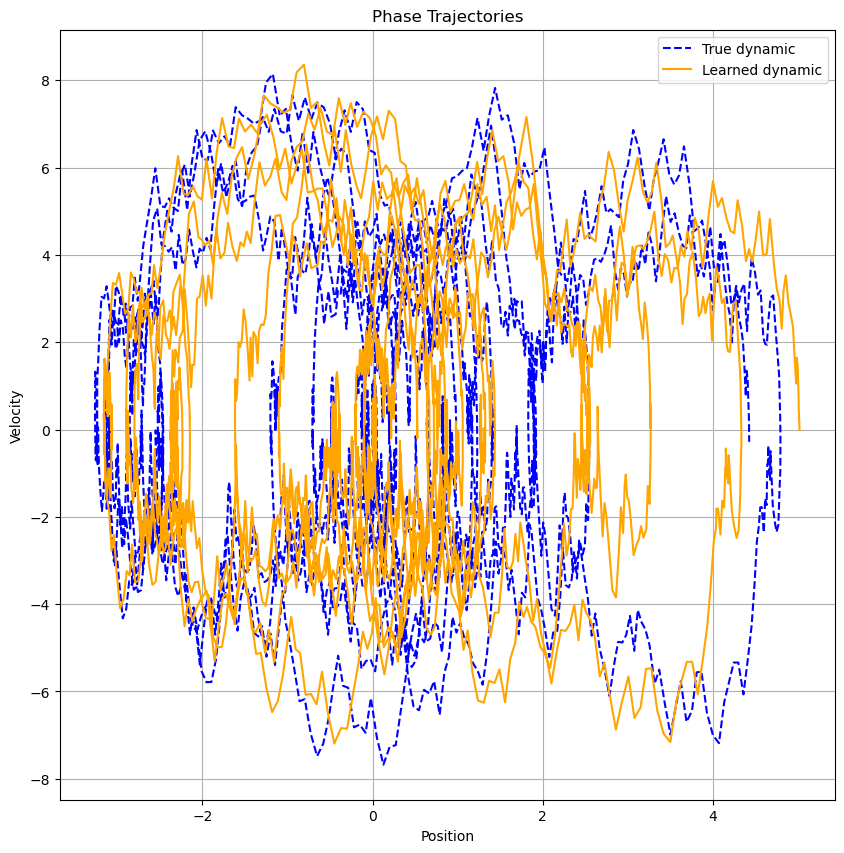

In [50]:
# Plot Phase Trajectories (Position vs Velocity)
plt.figure(2, (10, 10))
plt.plot(saved_traj[0,:,0], saved_traj[0,:,1], label="True dynamic", color="blue", linestyle="--")
plt.plot(saved_traj[1,:,0], saved_traj[1,:,1], label="Learned dynamic", color="orange")
plt.legend()
plt.grid(True)
plt.title("Phase Trajectories")
plt.xlabel("Position")
plt.ylabel("Velocity")
plt.show()